# Computer Vision and Machine learning Internship Assignment

## 1. Dataset Preparation:
Includes data dowload, splitting and aligning to COCO format to support this model

### Imports

In [ ]:
import gdown
import json
import random
import os
import shutil

### Dowloading the data:
Downloads the data directly from the sared the [link](https://drive.google.com/drive/folders/1DCpmo919b7OrAng9clEbiMHjO3D0hyoa?usp=sharing)

In [ ]:
def download_shared_gdrive_file(sharing_link, output):
  """
  dowload the data from google share link

  params:
  shared_link(string) - google share link of file
  output(string) - output path with file name and extension

  returns:
  none
  """

  file_id = sharing_link.split('/')[-2]
  url = f'https://drive.google.com/uc?id={file_id}'
  gdown.download(url, output, quiet=False)

dataset_zip_link = '<dataset-drive-share-link>'
annotaion_json_link = '<annotation-drive-share-link>'

download_shared_gdrive_file(dataset_zip_link, '<.zip-storage-path>')

download_shared_gdrive_file(annotaion_json_link, '<.json-storagwe-path>')

In [ ]:
!unzip <.zip-path> -d dataset #unzip the data

### Aligning dataset to COCO markdown  format
Dino repo data building uses specific markdown and naming, as shown below:
```
COCODIR/
  ├── train2017/
  ├── val2017/
  └── annotations/
  	├── instances_train2017.json
  	└── instances_val2017.json
```

In [ ]:
def load_json_data(path_to_json):
    """
    loads the json data.

    params:
    path_to_json(string) - path to data's Json file

    returns:
    dictionary of images, annotations and categories
    """
    with open(path_to_json, 'r') as file:
        data = json.load(file)
    return data

def split_json_data(json_data):
    """
    split the json data into testing and validation

    params:
    path_to_data(string) - path to the given downloaded data

    returns:
    train_json_data and val_json_data which are the original data splits with the same properties
    """

    # Setting seed with the answer to the "Great Question of Life, the Universe and Everything", "forty-two" -The Great computer
    random.seed(42)

    # Shuffle the images to ensure random distribution
    random.shuffle(json_data['images'])

    # Split ratios
    train_ratio = 0.8
    val_ratio = 0.2

    # Compute split indices
    total_images = len(json_data['images'])
    train_end = int(total_images * train_ratio)

    train_images = json_data['images'][:train_end]
    val_images = json_data['images'][train_end:]

    # Split annotations based on IDs
    train_ids = {image['id'] for image in train_images}
    val_ids = {image['id'] for image in val_images}

    train_annotations = [train_annotation for train_annotation in json_data['annotations'] if train_annotation['image_id'] in train_ids]
    val_annotations = [val_annotation for val_annotation in json_data['annotations'] if val_annotation['image_id'] in val_ids]
    categories = json_data['categories']

    # Storing splits into new JSON object
    train_json_data = {'images': train_images, 'annotations': train_annotations, 'categories': categories}
    val_json_data = {'images': val_images, 'annotations': val_annotations, 'categories': categories}

    return train_json_data, val_json_data

def store_data_to_coco_format(mode, json_data, dataset_path, destination_directory = './DATA_DIR'):
    """
    stores the data in coco naming format

    params:
    mode(string): either 'train' or 'val'
    json_data: json data of image annotations and properties in coco data format
    dataset_path: path to the original dataset
    destination_directory: path to store the data

    returns:
    none
    """
    # Creates the directory if doesn't exist
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)
        os.makedirs(os.path.join(destination_directory, 'annotations'))

    # writes the annotations in JSON
    with open(os.path.join(destination_directory, f'annotations/instances_{mode}2017.json'), 'w') as f:
        json.dump({
            "images": json_data['images'],
            "annotations": json_data['annotations'],
            "categories": json_data['categories']
        }, f, indent=4)

    # Move each image to its respective folder
    image_directory = os.path.join(destination_directory, f'{mode}2017')
    if not os.path.exists(image_directory):
        os.makedirs(image_directory)
    for image in json_data['images']:
        source = os.path.join(dataset_path, image['file_name'])
        destination = os.path.join(image_directory, image['file_name'])
        shutil.copy(source, destination)

In [ ]:
data = load_json_data('<.json-path>')
train_data, val_data = split_json_data(data)

In [ ]:
store_data_to_coco_format('train', train_data)
store_data_to_coco_format('val', val_data)

## 2. Repository Setup
Getting the repository and setting up the environment.
Dino repository was with the ```python=3.7.3,pytorch=1.9.0,cuda=11.1```


In [ ]:
!git clone https://github.com/IDEA-Research/DINO.git

Cloning into 'DINO'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 442 (delta 136), reused 95 (delta 95), pack-reused 246 (from 1)
Receiving objects: 100% (442/442), 13.43 MiB | 6.24 MiB/s, done.
Resolving deltas: 100% (191/191), done.


### Installing requirements
DINO requirements did not specifically mention the library versions, so I had to install the following lib version to avoid errors

In [ ]:
!pip install yapf==0.40.1

In [ ]:
%cd DINO

In [ ]:
!pip install -r requirements.txt

## 3. GPU Access
This notebook is operated under Google Collab to access CUDA

### compiling CUDA operators

In [ ]:
%cd ./models/dino/ops
!sh ./make.sh

## 4. Pre-trained Model
Downloaded the pre-trained DINO-4scale model from the following [link](https://drive.google.com/drive/folders/1qD5m1NmK0kjE5hh-G17XUX751WsEG-h_)

## 5. Validation
Evaluated the dataset with the downloaded checkpoint, detailes reporting on README file

### Converting compilation to UTF8 encoding
DINO supports the utf-8 encoding, in the below cell

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

### Running evaluation script
utilised the script to evaluate the dataset without modifications

In [ ]:
!bash scripts/DINO_eval.sh /content/drive/MyDrive/assignment/split_data /content/drive/MyDrive/assignment/checkpoint0011_4scale.pth

Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[10/27 08:02:39.953]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: clean, branch: main

[10/27 08:02:39.953]: Command: main.py --output_dir logs/DINO/R50-MS4-%j -c config/DINO/DINO_4scale.py --coco_path /content/drive/MyDrive/assignment/split_data --eval --resume /content/drive/MyDrive/assignment/checkpoint0011_4scale.pth --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[10/27 08:02:39.954]: Full config saved to logs/DINO/R50-MS4-%j/config_args_all.json
[10/27 08:02:39.954]: world size: 1
[10/27 08:02:39.954]: rank: 0
[10/27 08:02:39.954]: local_rank: 0
[10/27 08:02:39.954]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/drive/MyDrive/as

## 6. Report and Analysis:
Report and detailed in the README.md file
Below, you can see the demonstration of the visualisation([reference](https://github.com/IDEA-Research/DINO/blob/main/inference_and_visualization.ipynb))

In [ ]:
%cd DINO

### Imports from the DINO Directory

In [ ]:
from util.slconfig import SLConfig
import torch
from main import build_model_main
from datasets import build_dataset
from util import box_ops

### Loading the model

In [ ]:
model_config_path = "./config/DINO/DINO_4scale.py"
model_checkpoint_path = "<path-to-checkpoint.pth>"

In [ ]:
args = SLConfig.fromfile(model_config_path)
args.device = 'cuda'
model, criterion, postprocessors = build_model_main(args)
checkpoint = torch.load(model_checkpoint_path, map_location='cpu')
model.load_state_dict(checkpoint['model'])
_ = model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-59-af6d58e15201>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detail

### Visualisation

#### Reading the label names:

This step is optional, since we have only one label, and we can label as follows `'person'*len(labels[select_mask])`

In [ ]:
import json
with open('util/coco_id2name.json') as f:
    id2name = json.load(f)
    id2name = {int(k):v for k,v in id2name.items()}

#### Building the data
Now indexing the data to model preferred format

In [ ]:
args.dataset_file = 'coco'
args.coco_path = "path-of-arranged-coco-data"
args.fix_size = False

dataset_val = build_dataset(image_set='val', args=args)

data_aug_params: {
  "scales": [
    480,
    512,
    544,
    576,
    608,
    640,
    672,
    704,
    736,
    768,
    800
  ],
  "max_size": 1333,
  "scales2_resize": [
    400,
    500,
    600
  ],
  "scales2_crop": [
    384,
    600
  ]
}
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


#### Creating the definition to visualised Predicted and actual out

I have modified the COCOVisualizer code to plot the both predicted and actual images with bboxes([reference](https://github.com/IDEA-Research/DINO/blob/main/util/visualizer.py))

In [ ]:
import os
import datetime
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import torch
import numpy as np

def renorm(img: torch.FloatTensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) -> torch.FloatTensor:
    assert img.dim() == 3 or img.dim() == 4, "img.dim() should be 3 or 4 but %d" % img.dim()
    if img.dim() == 3:
        img_perm = img.permute(1, 2, 0)
        mean = torch.Tensor(mean)
        std = torch.Tensor(std)
        img_res = img_perm * std + mean
        return img_res.permute(2, 0, 1)
    else:
        img_perm = img.permute(0, 2, 3, 1)
        mean = torch.Tensor(mean)
        std = torch.Tensor(std)
        img_res = img_perm * std + mean
        return img_res.permute(0, 3, 1, 2)

def add_bounding_boxes(ax, tgt, title):
    assert 'boxes' in tgt
    H, W = tgt['size'].tolist()
    numbox = tgt['boxes'].shape[0]

    color = []
    polygons = []
    boxes = []
    for box in tgt['boxes'].cpu():
        unnormbbox = box * torch.Tensor([W, H, W, H])
        unnormbbox[:2] -= unnormbbox[2:] / 2
        [bbox_x, bbox_y, bbox_w, bbox_h] = unnormbbox.tolist()
        boxes.append([bbox_x, bbox_y, bbox_w, bbox_h])
        poly = [[bbox_x, bbox_y], [bbox_x, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y]]
        np_poly = np.array(poly).reshape((4, 2))
        polygons.append(Polygon(np_poly))
        c = (np.random.random((1, 3)) * 0.6 + 0.4).tolist()[0]
        color.append(c)

    p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.1)
    ax.add_collection(p)
    p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
    ax.add_collection(p)

    if 'box_label' in tgt:
        for idx, bl in enumerate(tgt['box_label']):
            _string = str(bl)
            bbox_x, bbox_y, bbox_w, bbox_h = boxes[idx]
            ax.text(bbox_x, bbox_y, _string, color='black', bbox={'facecolor': color[idx], 'alpha': 0.6, 'pad': 1})

    ax.set_title(title, wrap=True)

def visualize_comparative(img, predicted_tgt, actual_tgt, caption=None, dpi=120, savedir=None, show_in_console=True):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=dpi)
    plt.rcParams['font.size'] = '5'

    # Visualize Predicted Targets
    axs[0].imshow(renorm(img).permute(1, 2, 0))
    add_bounding_boxes(axs[0], predicted_tgt, 'Predicted')

    # Visualize Actual Targets
    axs[1].imshow(renorm(img).permute(1, 2, 0))
    add_bounding_boxes(axs[1], actual_tgt, 'Actual')

    if show_in_console:
        plt.show()

    if savedir is not None:
        if caption is None:
            caption = 'comparison'
        savename = '{}/{}-{}.png'.format(savedir, caption, int(predicted_tgt['image_id']), str(datetime.datetime.now()).replace(' ', '-'))
        print("savename: {}".format(savename))
        os.makedirs(os.path.dirname(savename), exist_ok=True)
        plt.savefig(savename)
    plt.close()


#### Visualizing
I used the validation dataset for the eval, I have limied the visualisation to 5 images for reducing the size of this notebook and to save the coputations on colab.

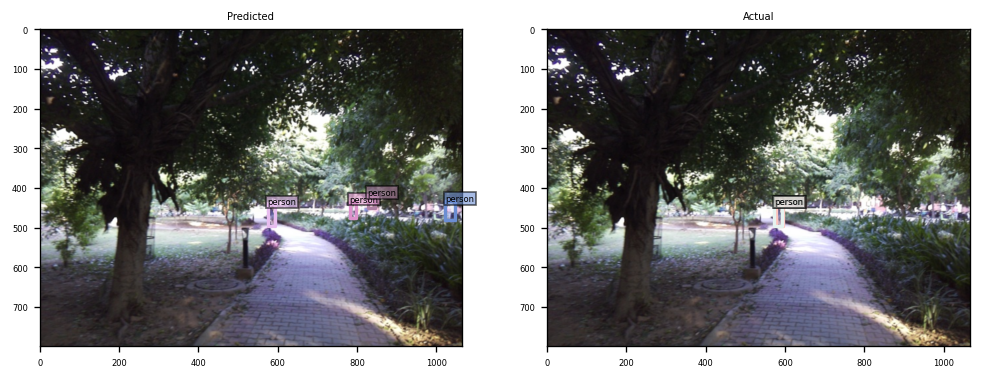

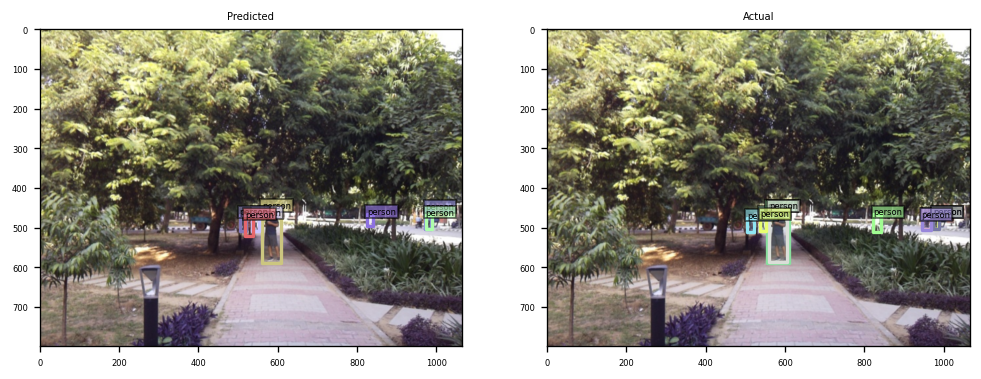

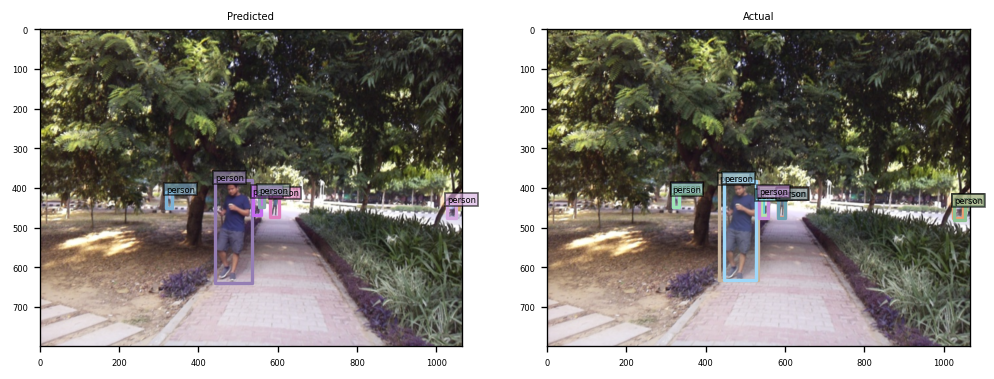

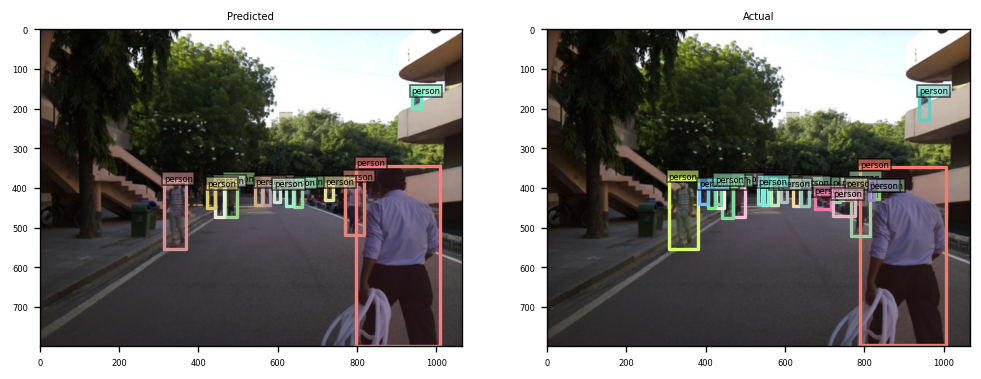

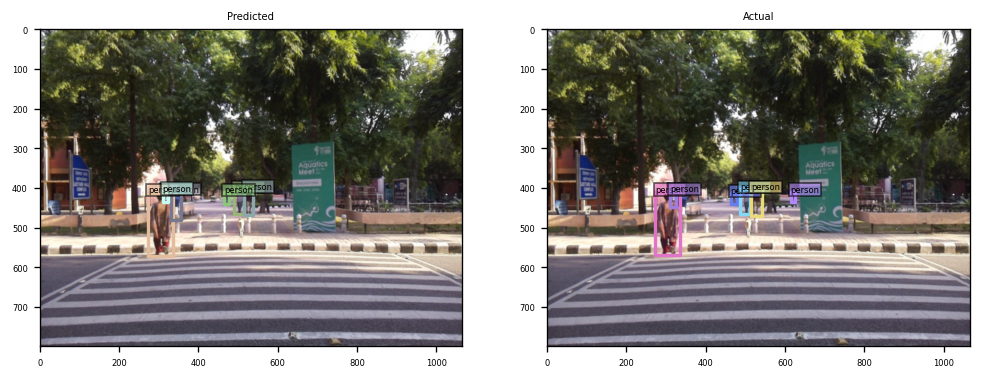

In [ ]:

limit = 0
for idx in range(len(dataset_val)):
    image, targets = dataset_val[idx]
    # Get model output
    output = model.cuda()(image[None].cuda())
    output = postprocessors['bbox'](output, torch.Tensor([[1.0, 1.0]]).cuda())[0]

    # Filter predictions based on threshold
    threshold = 0.3
    scores = output['scores']
    labels = output['labels']
    boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])
    select_mask = (scores > threshold) & (labels == 1)

    # Create prediction dictionary for visualization
    pred_box_label = [id2name[int(item)] for item in labels[select_mask]]
    pred_dict = {
        'boxes': boxes[select_mask].cpu(),
        'size': targets['size'],
        'box_label': pred_box_label
    }
    target_box_label = ['person'] * len(targets['labels'])
    target_dict = {
        'boxes': targets['boxes'],
        'image_id': targets['image_id'],
        'size': targets['size'],
        'box_label': target_box_label,
    }

    # Visualize predictions
    visualize_comparative(image, pred_dict, target_dict)
    if limit ==4:
      break
    limit += 1



## 7. Fine-tuning
I have utilized the downloaded checkpoint to fine-tune the model

In [ ]:
!python main.py \
	--output_dir /content/DINO_OUT/R50-MS4 -c config/DINO/DINO_4scale.py --coco_path /content/drive/MyDrive/assignment/split_data \
	--options dn_scalar=100 embed_init_tgt=TRUE \
	dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False \
	dn_box_noise_scale=1.0\
  --pretrain_model_path /content/drive/MyDrive/assignment/checkpoint0011_4scale.pth \
  --finetune_ignore label_enc.weight class_embed

Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[10/27 08:03:00.260]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: clean, branch: main

[10/27 08:03:00.260]: Command: main.py --output_dir /content/DINO_OUT/R50-MS4 -c config/DINO/DINO_4scale.py --coco_path /content/drive/MyDrive/assignment/split_data --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0 --pretrain_model_path /content/drive/MyDrive/assignment/checkpoint0011_4scale.pth --finetune_ignore label_enc.weight class_embed
[10/27 08:03:00.261]: Full config saved to /content/DINO_OUT/R50-MS4/config_args_all.json
[10/27 08:03:00.261]: world size: 1
[10/27 08:03:00.261]: rank: 0
[10/27 08:03:00.261]: local_rank: 0
[10/27 08:03:00.261]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 

### Re-Evaluation

You can see the best evaluation results in the 11th epoch. I am doing this re-re-evaluation to cross-check the checkpoint, so I have utilized the same evaluation script as before with the new checkpoint

In [ ]:
!bash scripts/DINO_eval.sh /content/drive/MyDrive/assignment/split_data /content/DINO_OUT/R50-MS4/checkpoint0011.pth

Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[10/27 08:30:16.719]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: clean, branch: main

[10/27 08:30:16.719]: Command: main.py --output_dir logs/DINO/R50-MS4-%j -c config/DINO/DINO_4scale.py --coco_path /content/drive/MyDrive/assignment/split_data --eval --resume /content/DINO_OUT/R50-MS4/checkpoint0011.pth --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[10/27 08:30:16.720]: Full config saved to logs/DINO/R50-MS4-%j/config_args_all.json
[10/27 08:30:16.720]: world size: 1
[10/27 08:30:16.720]: rank: 0
[10/27 08:30:16.720]: local_rank: 0
[10/27 08:30:16.720]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/drive/MyDrive/assignment/split_

### Visualizing the prediction with fine-tuned model

In [ ]:
model_config_path = "./config/DINO/DINO_4scale.py"
model_checkpoint_path = "/content/drive/MyDrive/DINO_OUT/R50-MS4/checkpoint0011.pth"

In [ ]:
args = SLConfig.fromfile(model_config_path)
args.device = 'cuda'
model, criterion, postprocessors = build_model_main(args)
checkpoint = torch.load(model_checkpoint_path, map_location='cpu')
model.load_state_dict(checkpoint['model'])
_ = model.eval()

<ipython-input-65-72ca36f16c8d>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_checkpoint_path, map_location='cpu')


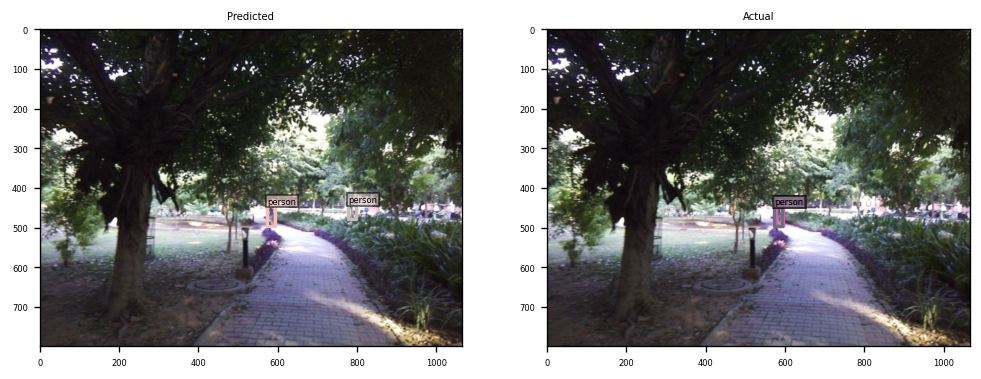

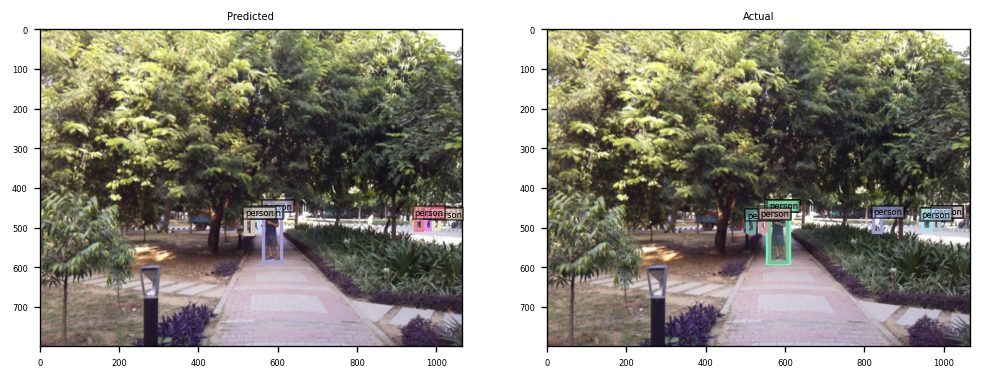

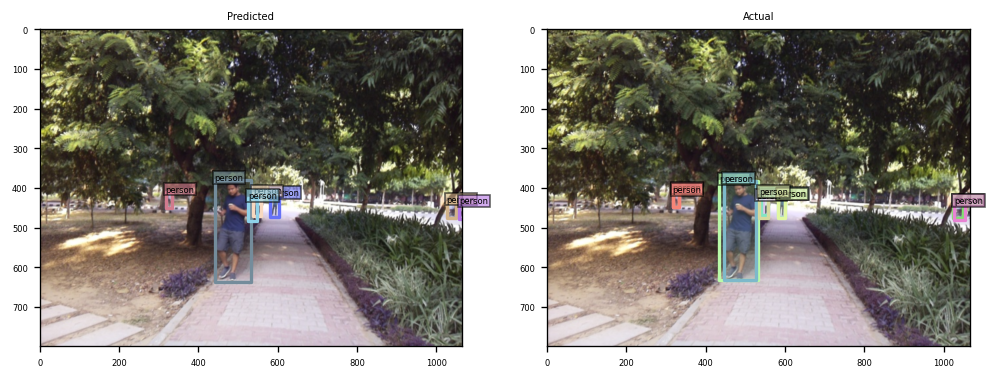

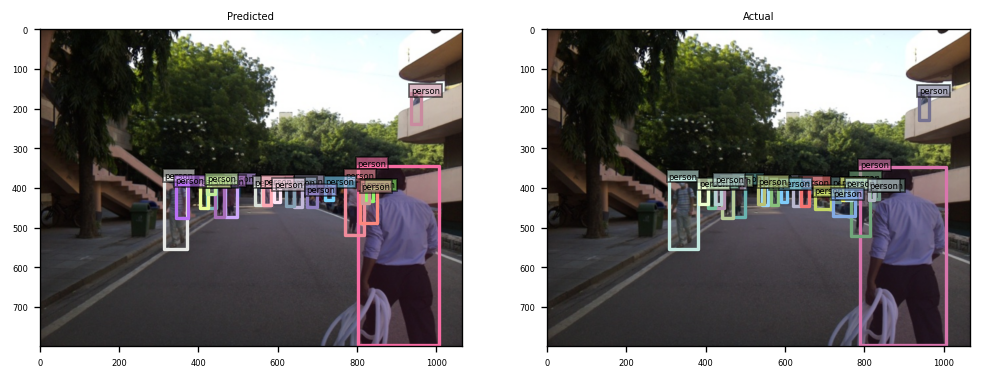

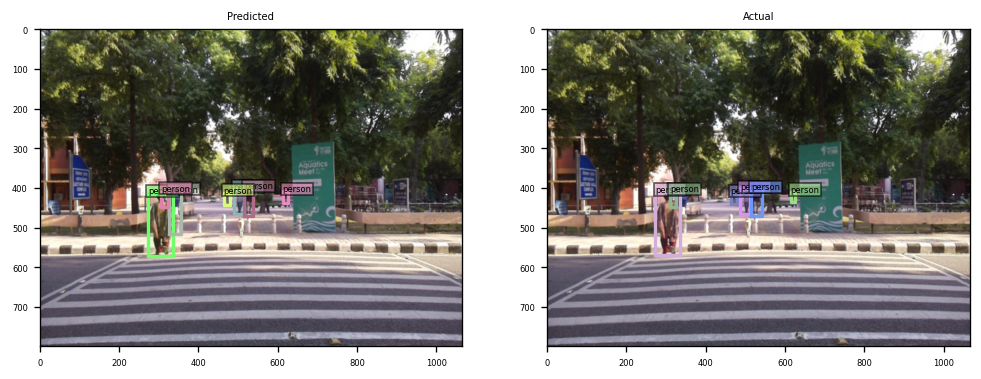

In [ ]:
limit = 0
for idx in range(len(dataset_val)):
    image, targets = dataset_val[idx]
    # Get model output
    output = model.cuda()(image[None].cuda())
    output = postprocessors['bbox'](output, torch.Tensor([[1.0, 1.0]]).cuda())[0]

    # Filter predictions based on threshold
    threshold = 0.3
    scores = output['scores']
    labels = output['labels']
    boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])
    select_mask = (scores > threshold) & (labels == 1)

    # Create prediction dictionary for visualization
    pred_box_label = [id2name[int(item)] for item in labels[select_mask]]
    pred_dict = {
        'boxes': boxes[select_mask],
        'size': targets['size'],
        'box_label': pred_box_label
    }
    target_box_label = ['person'] * len(targets['labels'])
    target_dict = {
        'boxes': targets['boxes'],
        'image_id': targets['image_id'],
        'size': targets['size'],
        'box_label': target_box_label,
    }

    # Visualize predictions
    visualize_comparative(image, pred_dict, target_dict)
    if limit ==4:
      break
    limit += 1

    # plot_bboxes(image, targets['boxes'], target_box_label, boxes[select_mask], pred_box_label)
